## DSC 540 - Project ML - Luuk Wassenaar

Professor Ustun

1 June 2022

Dataset title: Heart Attack 

Dataset source: https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

# Project Description

For my final project I will predict the chance of getting a heart attack through various machine learning tools we have learned throughout this class. The variables in this dataset include:

Age : Age of the patient

Sex : Sex of the patient

exang: exercise induced angina (1 = yes; 0 = no)

ca: number of major vessels (0-3)

cp : Chest Pain type chest pain type

Value 1: typical angina
Value 2: atypical angina
Value 3: non-anginal pain
Value 4: asymptomatic
trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

rest_ecg : resting electrocardiographic results

Value 0: normal
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
thalach : maximum heart rate achieved

target : 0= less chance of heart attack 1= more chance of heart attack

# Initial Libraries

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics

In [19]:
import sklearn
sklearn.__version__

'0.22.1'

# Retrieving Data

In [20]:
df = pd.read_csv("heart.csv")

# Data Exploration

Checking if the dataset has been imported all variables correctly

In [22]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Checking summary of the dataset

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Checking if the data includes any null

In [23]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

Checking for the unique values of the dependent variable (output)

In [28]:
df['output'].value_counts()

1    165
0    138
Name: output, dtype: int64

The difference between the 0s and 1s is small, but could definitely cause some distortion in the data predictions. We would want these to be equal.

In [29]:
df['output'].unique()

array([1, 0])

Checking if any correlation exists between variables

In [24]:
df.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


Separating the dependent variables from the independent variables

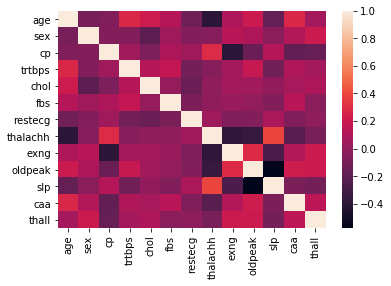

In [282]:
sns.heatmap(X.corr());

As can be seen in the correlation matrices is that there is barely any correlation in the dataset. This is great.

# Train Test Split
### 90/10 train/test
### 80/20 train/val

In [33]:
from sklearn.model_selection import train_test_split

In [31]:
X = df.drop(['output'], axis=1)

In [32]:
y = df['output']

In [35]:
RANDOM_STATE = 0

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=RANDOM_STATE)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=RANDOM_STATE)

# 1. Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model, metrics

from sklearn import metrics

In [38]:
clf = linear_model.LogisticRegression(max_iter = 10000, C=0.1)

In [39]:
clf.fit(X_train, y_train)

pred_train = clf.predict(X_train)

pred_test = clf.predict(X_test)

In [40]:
# train accuracy
(y_train == pred_train).mean()

0.8433179723502304

In [41]:
# Test Accuracy
(y_test == pred_test).mean()

0.8387096774193549

### Confusion Matrix of Test and Training data

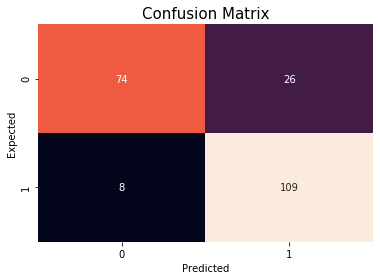

In [44]:
confusion_matrix =  pd.crosstab(index = y_train, columns=pred_train.ravel(), rownames=['Expected'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, square=False, fmt='', cbar=False)
plt.title("Confusion Matrix", fontsize = 15)
plt.show()

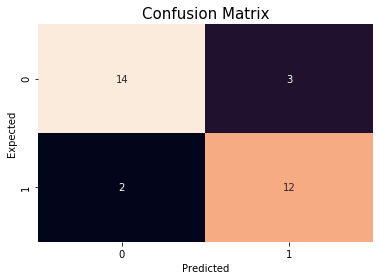

In [45]:
confusion_matrix =  pd.crosstab(index = y_test, columns=pred_test.ravel(), rownames=['Expected'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, square=False, fmt='', cbar=False)
plt.title("Confusion Matrix", fontsize = 15)
plt.show()

### Performance Test and Training data

In [90]:
### PERFORMANCE TEST SET

print(metrics.classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.80      0.71      0.75        17
           1       0.69      0.79      0.73        14

    accuracy                           0.74        31
   macro avg       0.74      0.75      0.74        31
weighted avg       0.75      0.74      0.74        31



In [48]:
### PERFORMANCE TRAIN SET

print(metrics.classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       0.90      0.74      0.81       100
           1       0.81      0.93      0.87       117

    accuracy                           0.84       217
   macro avg       0.85      0.84      0.84       217
weighted avg       0.85      0.84      0.84       217



### Parameters Tuning

In [50]:
# code

C_list = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 2, 10, 50, 100, 200, 500, 1000, 2000, 5000, 10000]

scores_tr = []
scores_val = []
for C in C_list:
    clf = LogisticRegression(C=C, max_iter=2000)
    clf.fit(X_train, y_train)
    print('Iterations:',clf.n_iter_)

    pred=clf.predict(X_train)
    scores_tr.append(metrics.accuracy_score(y_train, pred))
    
    pred=clf.predict(X_test)
    scores_val.append(metrics.accuracy_score(y_test, pred))

Iterations: [57]
Iterations: [70]
Iterations: [91]
Iterations: [137]
Iterations: [158]
Iterations: [444]
Iterations: [486]
Iterations: [202]
Iterations: [296]
Iterations: [341]
Iterations: [805]
Iterations: [862]
Iterations: [833]
Iterations: [815]
Iterations: [770]
Iterations: [733]
Iterations: [687]
Iterations: [717]
Iterations: [1006]


In [51]:
scores_tr

[0.7050691244239631,
 0.728110599078341,
 0.728110599078341,
 0.7649769585253456,
 0.783410138248848,
 0.8387096774193549,
 0.8433179723502304,
 0.847926267281106,
 0.847926267281106,
 0.8433179723502304,
 0.8525345622119815,
 0.8525345622119815,
 0.8525345622119815,
 0.8525345622119815,
 0.8525345622119815,
 0.8525345622119815,
 0.8525345622119815,
 0.8525345622119815,
 0.8525345622119815]

In [52]:
scores_val

[0.7741935483870968,
 0.7741935483870968,
 0.7741935483870968,
 0.8064516129032258,
 0.8064516129032258,
 0.8387096774193549,
 0.8387096774193549,
 0.8709677419354839,
 0.8709677419354839,
 0.8709677419354839,
 0.8709677419354839,
 0.8709677419354839,
 0.8709677419354839,
 0.8709677419354839,
 0.8709677419354839,
 0.8709677419354839,
 0.8709677419354839,
 0.8709677419354839,
 0.8709677419354839]

### Using best parameters into the model

In [283]:
clf = linear_model.LogisticRegression(max_iter = 2000, C=1)

In [284]:
clf.fit(X_train, y_train)

pred_train = clf.predict(X_train)

pred_test = clf.predict(X_test)

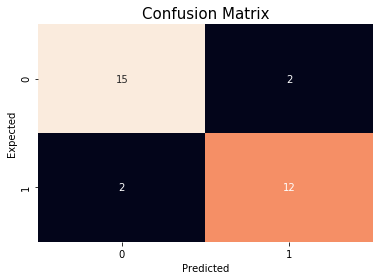

In [285]:
confusion_matrix =  pd.crosstab(index = y_test, columns=pred_test.ravel(), rownames=['Expected'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, square=False, fmt='', cbar=False)
plt.title("Confusion Matrix", fontsize = 15)
plt.show()

In [286]:
### PERFORMANCE TEST SET

print(metrics.classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        17
           1       0.86      0.86      0.86        14

    accuracy                           0.87        31
   macro avg       0.87      0.87      0.87        31
weighted avg       0.87      0.87      0.87        31



# 2. K-Neighbors

In [80]:
from sklearn.neighbors import KNeighborsClassifier

In [81]:
clf2 = KNeighborsClassifier(n_neighbors=1)

In [82]:
clf2.fit(X_train, y_train)

pred_train = clf2.predict(X_train)

pred_test = clf2.predict(X_test)

### Confusion Matrix of Test and Training data

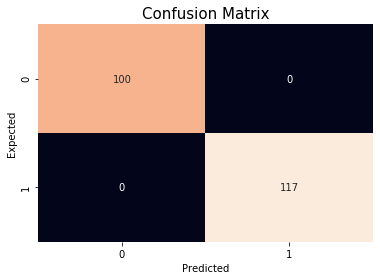

In [83]:
confusion_matrix2 =  pd.crosstab(index = y_train, columns=pred_train.ravel(), rownames=['Expected'], colnames=['Predicted'])
sns.heatmap(confusion_matrix2, annot=True, square=False, fmt='', cbar=False)
plt.title("Confusion Matrix", fontsize = 15)
plt.show()

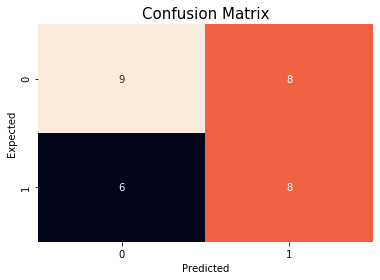

In [84]:
confusion_matrix2 =  pd.crosstab(index = y_test, columns=pred_test.ravel(), rownames=['Expected'], colnames=['Predicted'])
sns.heatmap(confusion_matrix2, annot=True, square=False, fmt='', cbar=False)
plt.title("Confusion Matrix", fontsize = 15)
plt.show()

### Performance Test and Training data

In [85]:
### PERFORMANCE TEST SET

print(metrics.classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.60      0.53      0.56        17
           1       0.50      0.57      0.53        14

    accuracy                           0.55        31
   macro avg       0.55      0.55      0.55        31
weighted avg       0.55      0.55      0.55        31



In [86]:
### PERFORMANCE TRAIN SET

print(metrics.classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       117

    accuracy                           1.00       217
   macro avg       1.00      1.00      1.00       217
weighted avg       1.00      1.00      1.00       217



### Parameters Tuning

In [74]:
K_list = [1,3,5,7,9,15,19,25,29,35,39,45,49,99]

scores_tr2 = []
scores_val2 = []

pred_val2=[]
pred_tr2=[]

for K in K_list:
    clf = KNeighborsClassifier(n_neighbors=K)
    clf.fit(X_train, y_train)
    pred_tr2 = clf.predict(X_train)
    pred_val2 = clf.predict(X_test)
    
    scores_tr2.append((metrics.accuracy_score(y_train, pred_tr2)))
    scores_val2.append((metrics.accuracy_score(y_test, pred_val2)))

In [75]:
scores_tr2

[1.0,
 0.7972350230414746,
 0.7741935483870968,
 0.7465437788018433,
 0.7373271889400922,
 0.7050691244239631,
 0.6912442396313364,
 0.7142857142857143,
 0.7050691244239631,
 0.7050691244239631,
 0.6912442396313364,
 0.663594470046083,
 0.6589861751152074,
 0.6405529953917051]

In [76]:
scores_val2

[0.5483870967741935,
 0.5806451612903226,
 0.5806451612903226,
 0.7419354838709677,
 0.7419354838709677,
 0.7419354838709677,
 0.7419354838709677,
 0.7096774193548387,
 0.7096774193548387,
 0.7419354838709677,
 0.7096774193548387,
 0.7096774193548387,
 0.7096774193548387,
 0.6451612903225806]

### KNeighbors Final Model

In [87]:
clf2 = KNeighborsClassifier(n_neighbors=7)

In [88]:
clf2.fit(X_train, y_train)

pred_train = clf2.predict(X_train)

pred_test = clf2.predict(X_test)

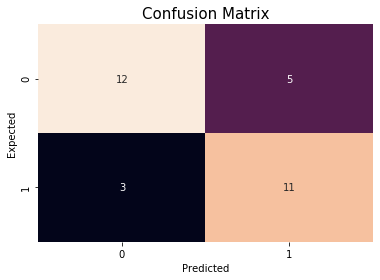

In [89]:
confusion_matrix =  pd.crosstab(index = y_test, columns=pred_test.ravel(), rownames=['Expected'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, square=False, fmt='', cbar=False)
plt.title("Confusion Matrix", fontsize = 15)
plt.show()

In [91]:
### PERFORMANCE FINAL MODEL SET

print(metrics.classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.80      0.71      0.75        17
           1       0.69      0.79      0.73        14

    accuracy                           0.74        31
   macro avg       0.74      0.75      0.74        31
weighted avg       0.75      0.74      0.74        31



# 3. Decision Tree Model

In [92]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [94]:
dt = DecisionTreeClassifier()

In [95]:
dt.fit(X_train, y_train)

pred_train = dt.predict(X_train)

pred_test = dt.predict(X_test)

### Confusion Matrix of Test and Training data

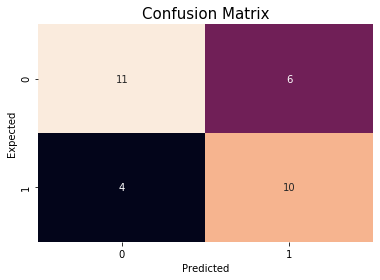

In [97]:
confusion_matrix2 =  pd.crosstab(index = y_test, columns=pred_test.ravel(), rownames=['Expected'], colnames=['Predicted'])
sns.heatmap(confusion_matrix2, annot=True, square=False, fmt='', cbar=False)
plt.title("Confusion Matrix", fontsize = 15)
plt.show()

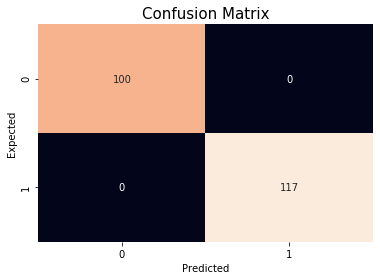

In [98]:
confusion_matrix2 =  pd.crosstab(index = y_train, columns=pred_train.ravel(), rownames=['Expected'], colnames=['Predicted'])
sns.heatmap(confusion_matrix2, annot=True, square=False, fmt='', cbar=False)
plt.title("Confusion Matrix", fontsize = 15)
plt.show()

### Performance Test and Training data

In [99]:
### PERFORMANCE TEST SET

print(metrics.classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.73      0.65      0.69        17
           1       0.62      0.71      0.67        14

    accuracy                           0.68        31
   macro avg       0.68      0.68      0.68        31
weighted avg       0.68      0.68      0.68        31



In [100]:
### PERFORMANCE TRAIN SET

print(metrics.classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       117

    accuracy                           1.00       217
   macro avg       1.00      1.00      1.00       217
weighted avg       1.00      1.00      1.00       217



### Hyper Parameter Tuning

In [101]:
### PERFORMING HYPER PARAMETER TUNING 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

In [102]:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

In [103]:
dt = DecisionTreeClassifier()
scores = cross_val_score(dt, X=X_train, y=y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print('CV accuracy scores: %s' % scores)

CV accuracy scores: [0.72727273 0.86363636 0.81818182 0.90909091 0.81818182 0.68181818
 0.63636364 0.76190476 0.80952381 0.80952381]


In [104]:
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy: 0.784 +/- 0.078


### HYPER PARAMETER TUNING for min_samples_split

In [106]:
min_samples_split = [5, 10, 20, 25, 30, 40, 50]

In [107]:
scores_params = []
for m in min_samples_split:
    dt = DecisionTreeClassifier(min_samples_split=m)
    scores = cross_val_score(dt, X=X_train, y=y_train, scoring='accuracy', cv=cv)
    scores_params.append(scores.mean())

In [108]:
scores_params

[0.769047619047619,
 0.7413419913419913,
 0.765151515151515,
 0.7606060606060605,
 0.7512987012987014,
 0.7329004329004329,
 0.7231601731601731]

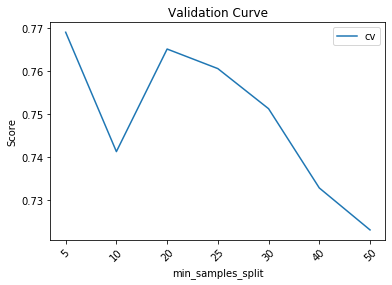

In [109]:
### Best min_samples_split is 20
plt.plot(scores_params, label = 'cv')
# plt.plot(scores_val, label = 'val')
plt.xticks(np.arange(len(min_samples_split)), min_samples_split, rotation=45)
plt.xlabel('min_samples_split')
plt.ylabel('Score')
plt.title('Validation Curve')
plt.legend()
plt.show()

In [110]:
# Highest score at min_samples_split of 5.

### HYPER PARAMETER TUNING for max_depth

In [115]:
### HYPER PARAMETER TUNING for max_depth
max_depth = [1, 2, 3, 4, 5, 10]

In [116]:
scores_params = []
for m in max_depth:
    dt = DecisionTreeClassifier(max_depth=m)
    scores = cross_val_score(dt, X=X_train, y=y_train, scoring='accuracy', cv=cv)
    scores_params.append(scores.mean())

In [117]:
scores_params

[0.6952380952380952,
 0.7322510822510824,
 0.7558441558441558,
 0.7878787878787878,
 0.774025974025974,
 0.7508658008658009]

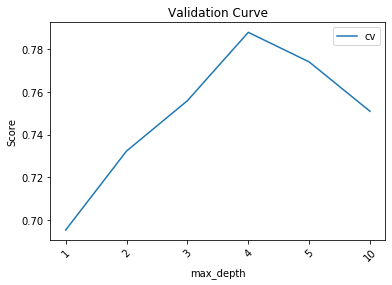

In [118]:

plt.plot(scores_params, label = 'cv')
# plt.plot(scores_val, label = 'val')
plt.xticks(np.arange(len(max_depth)), max_depth, rotation=45)
plt.xlabel('max_depth')
plt.ylabel('Score')
plt.title('Validation Curve')
plt.legend()
plt.show()

In [119]:
# Best performance score at max_depth = 4

# GridSearch

In [125]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [123]:
### Trying different values for min_samples_split and max_depth

params = dict(
    min_samples_split = [5, 10, 20, 30, 40, 50],
    max_depth = [1,2,3,None],
)

params

{'min_samples_split': [5, 10, 20, 30, 40, 50], 'max_depth': [1, 2, 3, None]}

In [126]:
### applying GridSearchCV to find best value

dt = DecisionTreeClassifier()
gs = GridSearchCV(estimator=dt, param_grid=params, scoring='f1', cv=cv, n_jobs=-1, )
gs

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True),
             error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
          

In [128]:
gs.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True),
             error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
          

In [129]:
gs.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [130]:
gs.best_estimator_.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 20,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

In [131]:
gs.best_params_

{'max_depth': 3, 'min_samples_split': 20}

### Decision Tree Final Model

In [138]:
dt = DecisionTreeClassifier(min_samples_split=20, max_depth = 3)

In [139]:
dt.fit(X_train, y_train)

pred_train = dt.predict(X_train)

pred_test = dt.predict(X_test)

In [140]:
### PERFORMANCE FINAL MODEL SET

print(metrics.classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.76      0.76      0.76        17
           1       0.71      0.71      0.71        14

    accuracy                           0.74        31
   macro avg       0.74      0.74      0.74        31
weighted avg       0.74      0.74      0.74        31



# 4. Random Forest Model

In [141]:
from sklearn.ensemble import RandomForestClassifier

In [142]:
rf = RandomForestClassifier()

In [144]:
rf.fit(X_train, y_train)

pred_train = rf.predict(X_train)

pred_val = rf.predict(X_val)

pred_test = rf.predict(X_test)

### Confusion Matrix of Test and Training data

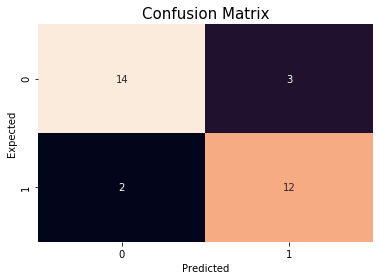

In [145]:
confusion_matrix2 =  pd.crosstab(index = y_test, columns=pred_test.ravel(), rownames=['Expected'], colnames=['Predicted'])
sns.heatmap(confusion_matrix2, annot=True, square=False, fmt='', cbar=False)
plt.title("Confusion Matrix", fontsize = 15)
plt.show()

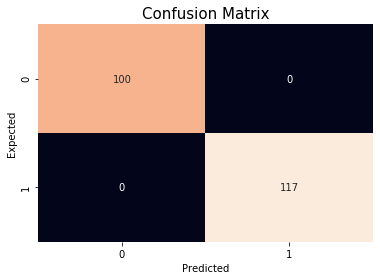

In [146]:
confusion_matrix2 =  pd.crosstab(index = y_train, columns=pred_train.ravel(), rownames=['Expected'], colnames=['Predicted'])
sns.heatmap(confusion_matrix2, annot=True, square=False, fmt='', cbar=False)
plt.title("Confusion Matrix", fontsize = 15)
plt.show()

### Performance Test and Training data

In [147]:
### PERFORMANCE TEST SET

print(metrics.classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.88      0.82      0.85        17
           1       0.80      0.86      0.83        14

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



In [148]:
### PERFORMANCE TEST SET

print(metrics.classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       117

    accuracy                           1.00       217
   macro avg       1.00      1.00      1.00       217
weighted avg       1.00      1.00      1.00       217



In [149]:
### PERFORMANCE VAL SET

print(metrics.classification_report(y_val, pred_val))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79        21
           1       0.88      0.85      0.87        34

    accuracy                           0.84        55
   macro avg       0.83      0.83      0.83        55
weighted avg       0.84      0.84      0.84        55



# GridSearch

In [150]:
# Creating various params for min_samples_split, max_depth, and n_estimators
params = dict(
    min_samples_split = [5, 10, 20, 30, 40, 50],
    max_depth = [1,2,3,None],
    n_estimators = [60,70,80,90,100,110,120],
)

params

{'min_samples_split': [5, 10, 20, 30, 40, 50],
 'max_depth': [1, 2, 3, None],
 'n_estimators': [60, 70, 80, 90, 100, 110, 120]}

In [151]:
rf = RandomForestClassifier()
gs = GridSearchCV(estimator=rf, param_grid=params, scoring='f1', cv=cv, )
gs

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                            

In [152]:
gs.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                            

In [153]:
gs.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [154]:
gs.best_params_

{'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 100}

### Random Forest Final Model

In [158]:
rf = RandomForestClassifier(max_depth = 3, min_samples_split= 10, n_estimators = 100)

In [159]:
rf.fit(X_train, y_train)

pred_train = rf.predict(X_train)

pred_val = rf.predict(X_val)

pred_test = rf.predict(X_test)

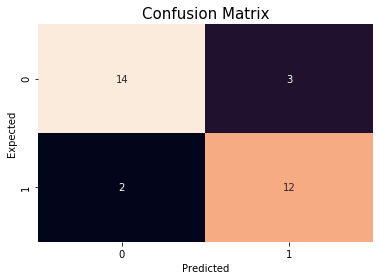

In [160]:
confusion_matrix2 =  pd.crosstab(index = y_test, columns=pred_test.ravel(), rownames=['Expected'], colnames=['Predicted'])
sns.heatmap(confusion_matrix2, annot=True, square=False, fmt='', cbar=False)
plt.title("Confusion Matrix", fontsize = 15)
plt.show()

In [162]:
### PERFORMANCE FINAL MODEL

print(metrics.classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.88      0.82      0.85        17
           1       0.80      0.86      0.83        14

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



# 5. Gradient Boosting Machine

In [167]:
from sklearn.ensemble import GradientBoostingClassifier

In [192]:
gb = GradientBoostingClassifier()

In [193]:
gb.fit(X_train, y_train)

pred_train = gb.predict(X_train)

pred_val = gb.predict(X_val)

pred_test = gb.predict(X_test)

### Confusion Matrix of Test and Training data

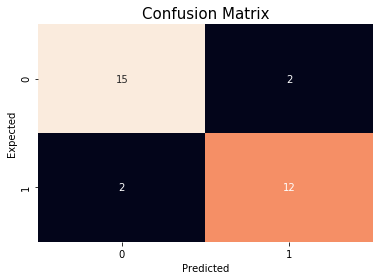

In [194]:
confusion_matrix2 =  pd.crosstab(index = y_test, columns=pred_test.ravel(), rownames=['Expected'], colnames=['Predicted'])
sns.heatmap(confusion_matrix2, annot=True, square=False, fmt='', cbar=False)
plt.title("Confusion Matrix", fontsize = 15)
plt.show()

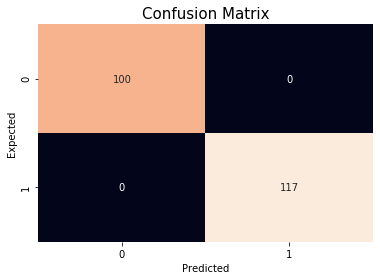

In [195]:
confusion_matrix2 =  pd.crosstab(index = y_train, columns=pred_train.ravel(), rownames=['Expected'], colnames=['Predicted'])
sns.heatmap(confusion_matrix2, annot=True, square=False, fmt='', cbar=False)
plt.title("Confusion Matrix", fontsize = 15)
plt.show()

### Performance Test and Training data

In [196]:
### PERFORMANCE TEST SET

print(metrics.classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        17
           1       0.86      0.86      0.86        14

    accuracy                           0.87        31
   macro avg       0.87      0.87      0.87        31
weighted avg       0.87      0.87      0.87        31



In [197]:
### PERFORMANCE TEST SET

print(metrics.classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       117

    accuracy                           1.00       217
   macro avg       1.00      1.00      1.00       217
weighted avg       1.00      1.00      1.00       217



### GRIDSEARCH

In [174]:
# Creating various params for min_samples_split, max_depth, and n_estimators
params = dict(
    learning_rate = [.2,.4,.6,.8,1],
    n_estimators = [60,70,80,90,100,110,120],
)

params

{'learning_rate': [0.2, 0.4, 0.6, 0.8, 1],
 'n_estimators': [60, 70, 80, 90, 100, 110, 120]}

In [175]:
gb = GradientBoostingClassifier()
gs = GridSearchCV(estimator=gb, param_grid=params, scoring='f1', cv=cv, )
gs

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True),
             error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  mi...
                                                  n_estimators=100,
                                    

In [179]:
gs.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True),
             error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  mi...
                                                  n_estimators=100,
                                    

In [180]:
gs.best_estimator_

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.4, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=110,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [181]:
gs.best_params_

{'learning_rate': 0.4, 'n_estimators': 110}

### Gradient Boosting Machine Final Model

In [198]:
gb = GradientBoostingClassifier(learning_rate = 0.2, n_estimators = 110)

In [199]:
gb.fit(X_train, y_train)

pred_test = gb.predict(X_test)

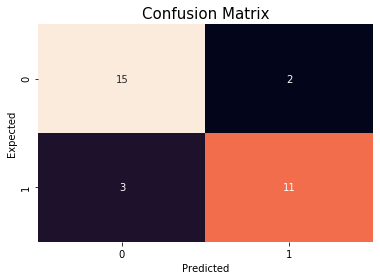

In [200]:
confusion_matrix2 =  pd.crosstab(index = y_test, columns=pred_test.ravel(), rownames=['Expected'], colnames=['Predicted'])
sns.heatmap(confusion_matrix2, annot=True, square=False, fmt='', cbar=False)
plt.title("Confusion Matrix", fontsize = 15)
plt.show()

In [201]:
### PERFORMANCE FINAL MODEL

print(metrics.classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86        17
           1       0.85      0.79      0.81        14

    accuracy                           0.84        31
   macro avg       0.84      0.83      0.84        31
weighted avg       0.84      0.84      0.84        31



# 6. Random Forest Regression Model

In [215]:
from sklearn.ensemble import RandomForestRegressor

In [216]:
estimator = RandomForestRegressor(n_estimators=100, random_state=RANDOM_STATE)

In [217]:
estimator.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

### R2 & RMSE on Training Data

In [218]:
pred = estimator.predict(X_train)

In [219]:
metrics.r2_score(pred, y_train)

0.8978468324903349

In [220]:
metrics.mean_squared_error(pred, y_train)

0.017550691244239632

### R2 & RMSE on Validation Data

In [221]:
pred_val = estimator.predict(X_val)

In [222]:
metrics.r2_score(pred_val, y_val)

-0.33558047029530047

In [223]:
metrics.mean_squared_error(pred_val, y_val)

0.15419636363636363

# 7. Random Forest Model with PCA  

In [245]:
from sklearn.decomposition import PCA

In [246]:
pca = PCA(n_components=None)

pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_val_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)

[0.76403268 0.90273667 0.98380653 0.99880892 0.99917774 0.99944235
 0.99965534 0.99975378 0.99982897 0.99988328 0.99992982 0.99996964
 1.        ]


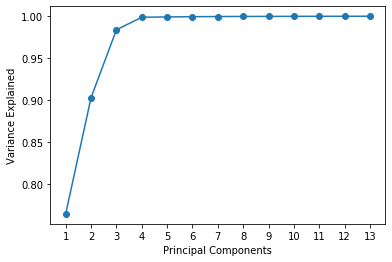

In [247]:
print(pca.explained_variance_ratio_.cumsum())
plt.plot(pca.explained_variance_ratio_.cumsum(), '-o');
plt.xticks(ticks= range(X_train_pca.shape[1]), labels=[i+1 for i in range(X_train_pca.shape[1])])
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained')
plt.show()

In [258]:
X_train_pca2 = X_train_pca[:, 0:5]
X_val_pca2 = X_val_pca[:, 0:5]
X_test_pca2 = X_test_pca[:, 0:5]

In [273]:
rf = RandomForestClassifier(max_depth = 3, min_samples_split= 10, n_estimators = 100)

In [274]:
rf.fit(X_train_pca2, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [277]:
pred = rf.predict(X_train_pca2)

In [278]:
metrics.r2_score(pred, y_train)

0.34994553376906323

In [279]:
rf.fit(X_train_pca2, y_train)

pred_train = rf.predict(X_train_pca2)

pred_val = rf.predict(X_val_pca2)

pred_test = rf.predict(X_test_pca2)

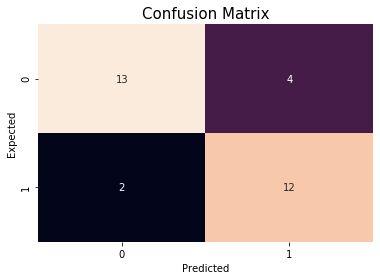

In [280]:
confusion_matrix2 =  pd.crosstab(index = y_test, columns=pred_test.ravel(), rownames=['Expected'], colnames=['Predicted'])
sns.heatmap(confusion_matrix2, annot=True, square=False, fmt='', cbar=False)
plt.title("Confusion Matrix", fontsize = 15)
plt.show()

In [281]:
### PERFORMANCE FINAL MODEL

print(metrics.classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.87      0.76      0.81        17
           1       0.75      0.86      0.80        14

    accuracy                           0.81        31
   macro avg       0.81      0.81      0.81        31
weighted avg       0.81      0.81      0.81        31



In [ ]:
# Although the accuracy went down. The number of estimators was reduced from 11 to 5, which makes the model way
# more explainable. However, we have to take into consideration that we are predicting heart attacks, and a false neg
# result would be disastrous as a doctor would tell the patient its changes of heart attacks are low while this is in 
# fact high.

# 8. Logistic Regression with PCA

In [288]:
pca = PCA(n_components=None)

pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_val_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)

In [289]:
X_train_pca2 = X_train_pca[:, 0:5]
X_val_pca2 = X_val_pca[:, 0:5]
X_test_pca2 = X_test_pca[:, 0:5]

In [290]:
clf = linear_model.LogisticRegression(max_iter = 2000, C=1)

In [291]:
clf.fit(X_train_pca2, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=2000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [292]:
pred = clf.predict(X_train_pca2)

In [293]:
pred_train = clf.predict(X_train_pca2)

pred_val = clf.predict(X_val_pca2)

pred_test = clf.predict(X_test_pca2)

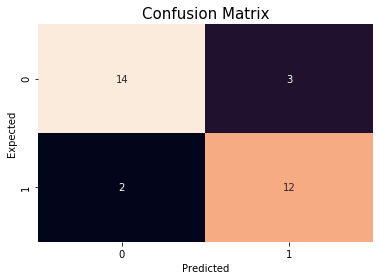

In [294]:
confusion_matrix2 =  pd.crosstab(index = y_test, columns=pred_test.ravel(), rownames=['Expected'], colnames=['Predicted'])
sns.heatmap(confusion_matrix2, annot=True, square=False, fmt='', cbar=False)
plt.title("Confusion Matrix", fontsize = 15)
plt.show()

In [295]:
print(metrics.classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.88      0.82      0.85        17
           1       0.80      0.86      0.83        14

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



# Picking The Best Model

1. Logistic Regression (accuracy):             .87

2. K Neighbors (accuracy):                     .74

3. Decision Tree (accuracy):                   .74

4. Random Forest (accuracy):                   .84

5. Gradient Boosting Machine (accuracy):       .84

6. Random Forest Regression Model (R2-Score):  .89

7. Random Forest with PCA (accuracy):          .81

8. Logistic Regression with PCA (accuracy):    .84


Based on the result above I would go with the Logistic Regression with PCA model. In general, Logistic Regression models are easily explainable. Using PCA we reduce the dimensions of the data, which helps with explainability as well. Even though, the initial Logistic Regression model scores higher in accuracy, the simplicity of the model is important as well.

There are several steps to improve the scores of my model:

 - First we look to increase the number of records. There are only 303 records. Increasing the number of records could increase the accuracy of the model.
 
 - Additionally, balancing the output variables could improve the model as well. We would like to see the same number of higher chance of heart attack values as lower chance of heart attack values.
 
 - Another way of improving the model is by combining several models with each other (ensemble models).